In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/cheru/Downloads/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Inertia:Inertia is the sum of squared distances between samples and their closest centroid. Lower values of inertia indicate better clustering.

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'}, inplace=True)
df.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
X=df.drop(['CustomerID','Genre'],axis=1)
X

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [11]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [12]:
inertias = []
sil_score = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    
    # Calculate silhouette score
    sil_score_a = silhouette_score(X_scaled, labels)
    sil_score.append(sil_score_a)
    
    # Store inertia
    inertias_a = kmeans.inertia_
    inertias.append(inertias_a)
    
    print(f"K={k}: Silhouette_Score={sil_score_a:.2f}, Inertia={inertias_a:.2f}")

joblib.dump(scaler, 'scaler.pkl')

K=2: Silhouette_Score=0.34, Inertia=389.39
K=3: Silhouette_Score=0.36, Inertia=295.46
K=4: Silhouette_Score=0.40, Inertia=205.23
K=5: Silhouette_Score=0.41, Inertia=169.89
K=6: Silhouette_Score=0.43, Inertia=134.35
K=7: Silhouette_Score=0.41, Inertia=121.39
K=8: Silhouette_Score=0.37, Inertia=113.73
K=9: Silhouette_Score=0.37, Inertia=102.14
K=10: Silhouette_Score=0.36, Inertia=92.55


['scaler.pkl']

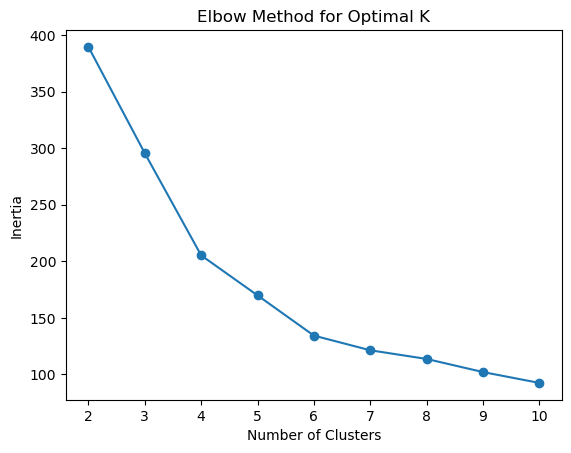

In [13]:
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



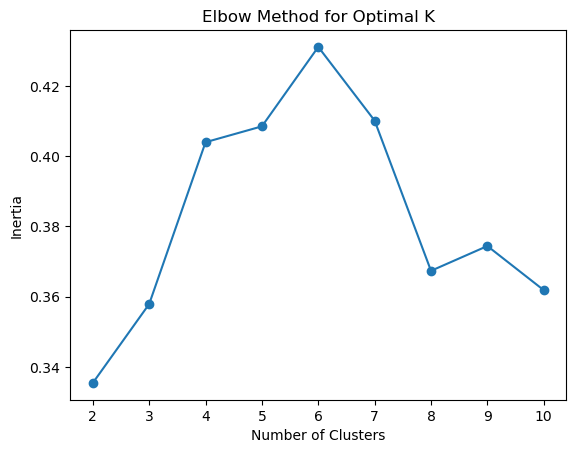

In [14]:
plt.plot(range(2, 11),sil_score , marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
model=KMeans(n_clusters=6,random_state=42)
model.fit(X_scaled)
model_labels=model.labels_

In [16]:
df['Cluster']=model_labels
df.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


In [17]:
cluster_profiles=df.groupby('Cluster')[['Age','Annual_Income','Spending_Score']].mean()
cluster_profiles

,Age,Annual_Income,Spending_Score
Cluster,,,
0,56.333333,54.266667,49.066667
1,32.692308,86.538462,82.128205
2,25.560000,26.480000,76.240000
3,26.125000,59.425000,44.450000
4,44.000000,90.133333,17.933333
5,45.523810,26.285714,19.380952


In [18]:
def marketing(cluster):
  if cluster==0:
    return 'Send luxury promotions'
  elif cluster==1:
    return 'Offer family friendly promotions'
  elif cluster==2:
    return 'promote youth based sales'
  elif cluster==3:
    return 'offer premium services'
  elif cluster==4:
    return 'promote family focused promotions'
  elif cluster==5:
    return 'Send personalized promotions'
  else:
    return 'General Marketing'

df['marketing']=df['Cluster'].apply(marketing)
df.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score,Cluster,marketing
0,1,Male,19,15,39,2,promote youth based sales
1,2,Male,21,15,81,2,promote youth based sales
2,3,Female,20,16,6,5,Send personalized promotions
3,4,Female,23,16,77,2,promote youth based sales
4,5,Female,31,17,40,5,Send personalized promotions


In [19]:
joblib.dump(model, 'kmeans_model.pkl')

['kmeans_model.pkl']